## Load Dataset

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

## Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Data Cleaning

In [ ]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df.dropna(inplace=True)

## Encode 

In [ ]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df.Married=df.Married.map({'Yes':1,'No':0})
df.Dependents=df.Dependents.map({'0':0,'1':0.25,'2':0.5,'3+':1})
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df.Property_Area=df.Property_Area.map({'Urban':1,'Semiurban':0.5,'Rural':0})
df.Loan_Status=df.Loan_Status.map({'Y':1,'N':0})

## Data process

In [ ]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
y = np.array(df.Loan_Status)
X = np.zeros((11,y.size))
X[0] = np.array(df.Gender)
X[1] = np.array(df.Married)
X[2] = np.array(df.Dependents)
X[3] = np.array(df.Education)
X[4] = np.array(df.Self_Employed)
X[5] = np.array(df.ApplicantIncome)
X[6] = np.array(df.CoapplicantIncome)
X[7] = np.array(df.LoanAmount)
X[8] = np.array(df.Loan_Amount_Term)
X[9] = np.array(df.Credit_History)
X[10] = np.array(df.Property_Area)
X[5] = X[5] / np.max(X[5])
X[6] = X[6] / np.max(X[6])
X[7] = X[7] / np.max(X[7])
X[8] = X[8] / np.max(X[8])
X = X.T
index = np.random.permutation(y.size)
X = X[index]
y = y[index]
t = (int)(7 * y.size / 10)
X_train = X[0:(t-1),:]
X_test = X[t:(y.size-1),:]
y_train = y[0:(t-1)]
y_test = y[t:(y.size-1)]
print('size: ' + str(y.size))
print('train size: ' + str(t))

size: 511
train size: 357


## Train

In [ ]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training
LR = LogisticRegression("l2", 0.45)
dr = LR.fit(X_train, y_train, 0.007, 1e-7, 1e3)

reached max iter


## Test

accuracy:
0.8627450980392157


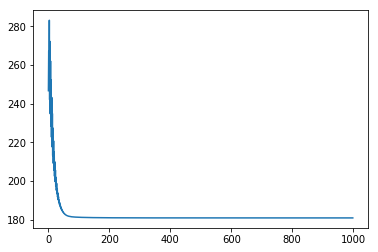

In [ ]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
y_p = LR.predict(X_test)
acc = 1 - np.sum(np.abs(y_p - y_test))/y_p.size
#for i in range(len(dr)):
#    if dr[i] == float('inf'):
#        dr[i] = dr[i-1]
plt.plot(dr)
print("accuracy:")
print(acc)